In [23]:
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt

## General Pivot Table 

In [24]:
# Generate the pivot table showing ALL data from the DataFrame

file = "./transaction-data-adhoc-analysis.json"
df = pd.read_json(file)

df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


# I. Breakdown of the count of each item sold per month

## DataFrame I: Each Item Sold per Month

In [25]:
# Dictionary for the months of the General Pivot Table
months = {'/01/':'January',
         '/02/':'February',
         '/03/':'March',
         '/04/':'April',
         '/05/':'May',
         '/06/':'June'}

# Makes a new column for months into the dataframe
for i in months:
    df.loc[df["transaction_date"].str.contains(i),"month"] = months[i]

def products_receipt(month):
    per_month = df[df["month"]==month]

    per_month['transaction_items']
    new_list = []
    for index, row in per_month.iterrows():
        x = (row["transaction_items"].split(";"))
        for i in range(0,len(x)):
            new_list.append(x[i].split(','))

    # Places the brand, items, and quantity into a new dataframe 
    item_df = pd.DataFrame(new_list,columns=['brand','Items','quantity'])
    item_df['quantity'] = item_df['quantity'].str.extract('(\d+)',expand=False).astype(int)

    #Classifies the items and adds them 
    monthly_receipt=item_df.groupby('Items').sum().squeeze()
    return monthly_receipt

#Creates the dataframe considering the dictionary
products_sold_df = pd.DataFrame({i:products_receipt(i) for i in list(months.values())})

# Makes a new column for Total Items (sum of each item from January to June)
products_sold_df['Total Items'] = products_sold_df['January'] + products_sold_df['February'] + products_sold_df['March'] + products_sold_df['April'] + products_sold_df['May'] + products_sold_df['June'] 

products_sold_df

,January,February,March,April,May,June,Total Items
Items,,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902,59302
Gummy Vitamins,9681,9980,10145,9842,9948,9980,59576
Gummy Worms,9559,9996,9986,10043,9801,9934,59319
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104,59390
Nutrional Milk,9727,9691,9876,9786,9881,9767,58728
Orange Beans,9774,10037,9611,9914,9964,10106,59406
Yummy Vegetables,9959,10256,9896,9861,9735,9722,59429


### Bar Graph for DataFrame I: Each Item Sold per Month

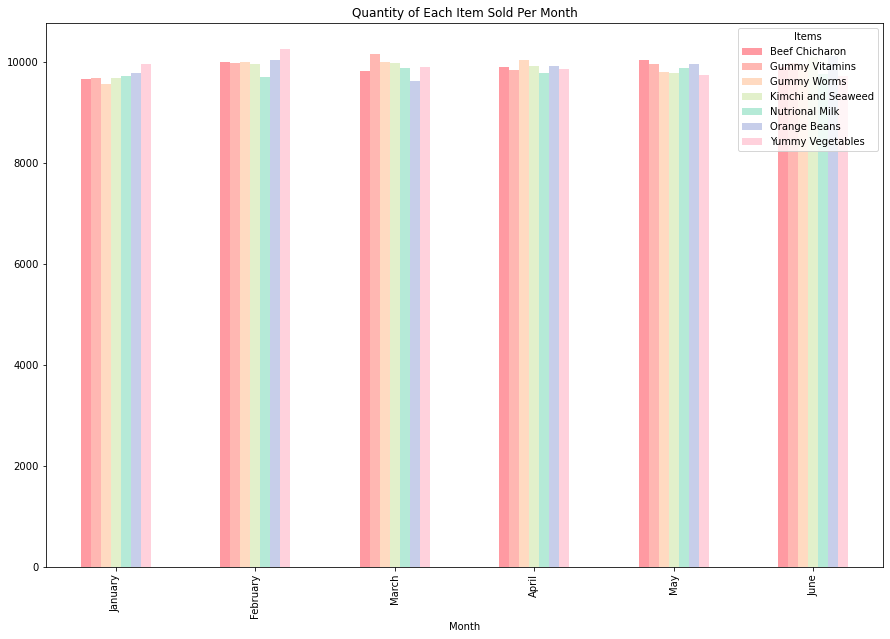

In [26]:
new_sold_df = products_sold_df.transpose()
new_sold_df.index.name = 'Month'
new_sold_df.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

new_sold_df=new_sold_df[['Month','Beef Chicharon','Gummy Vitamins','Gummy Worms','Kimchi and Seaweed','Nutrional Milk','Orange Beans','Yummy Vegetables']].iloc[:6]

new_sold_df.plot(x='Month',
        kind='bar',
        stacked=False,
        title='Quantity of Each Item Sold Per Month',
           figsize=(15,10),
           color = ['#FF9AA2', '#FFB7B2', '#FFDAC1','#E2F0CB', '#B5EAD7', '#C7CEEA', '#FFD1DC']);

### Pie Graph for DataFrame I: Each Item Sold from January to June

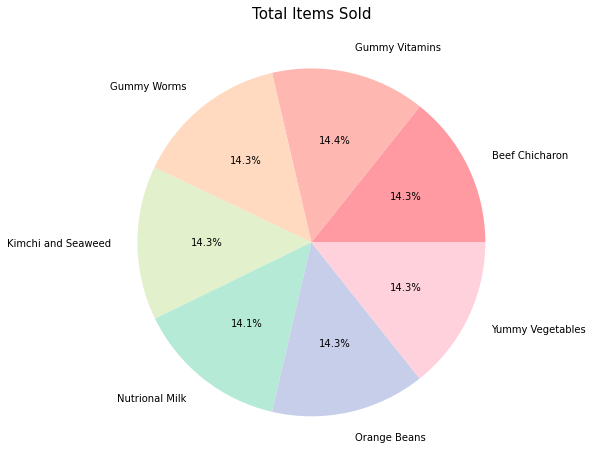

In [27]:
products = products_sold_df.index
values = products_sold_df['Total Items']

plt.figure(figsize=(12,8))
plt.pie(values, labels=products, autopct='%1.1f%%',labeldistance=1.15,
        colors = ['#FF9AA2', '#FFB7B2', '#FFDAC1','#E2F0CB', '#B5EAD7', '#C7CEEA', '#FFD1DC']);
plt.title('Total Items Sold',fontsize=15)
plt.show();

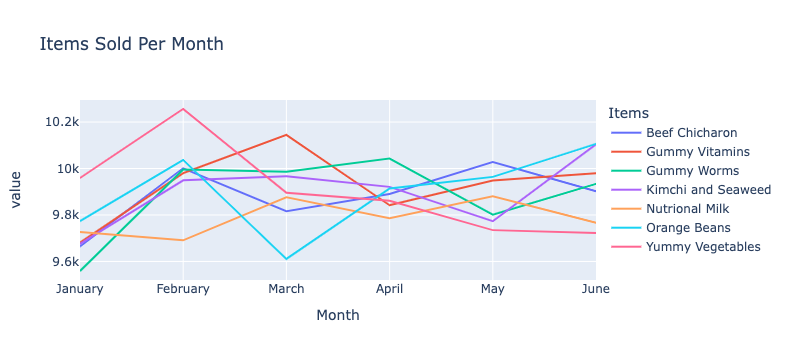

In [28]:
import plotly.express as px

new_sold_df = products_sold_df.transpose()
new_sold_df.index.name = 'Month'

new_sold_df=new_sold_df.iloc[:6]
new_sold_df

fig = px.line(new_sold_df, 
              title='Items Sold Per Month')
fig

# II. Breakdown of the total sale value per item per month

In [29]:
# Get rows without ; and rows with x1, and drop the duplicates (for cleaning the json dataframe)
price_chart = df[["transaction_items","transaction_value"]].drop_duplicates(subset=['transaction_items']).loc[(df['transaction_items'].str.contains(";") == False) & (df['transaction_items'].str.contains("x1"))]

# Obtain product name from the price list as index 
def new_index(name):
    index_name = name[name.index(",")+1:name.index(",",name.index(",")+1)]
    return index_name

# Uses the new index names to make a column for products sold in the price list 
price_chart['Items'] = price_chart['transaction_items'].apply(new_index)
cost_per_item = price_chart.set_index('Items')['transaction_value']

# Dataframe for the cost of each item 
total_sales_df = products_sold_df.copy(deep = True)
total_sales_df['Cost per Item'] = cost_per_item

# Cost per item is multiplied to the items sold 
for i in list(products_sold_df.keys()):
    total_sales_df[i]=total_sales_df['Cost per Item']*products_sold_df[i]
    

total_sales_df=total_sales_df[['Cost per Item','January','February','March','April','May','June']]

# Creates a column for Total Sales per Item
total_sales_df['Total Sales per Item'] = total_sales_df['January'] + total_sales_df['February'] + total_sales_df['March'] + total_sales_df['April'] + total_sales_df['May'] + total_sales_df['June']

# Total Monthly Sales Row
total_row = total_sales_df.sum().drop('Cost per Item')
total_sales_df.loc['Total Monthly Sales']=total_row
total_sales_df.replace(np.nan, '', regex=True,inplace=True)
total_sales_df = total_sales_df.astype(int,errors='ignore')

total_sales_df

Month,Cost per Item,January,February,March,April,May,June,Total Sales per Item
Items,,,,,,,,
Beef Chicharon,1299.0,12554835,12991299,12750984,12847110,13026372,12862698,77033298
Gummy Vitamins,1500.0,14521500,14970000,15217500,14763000,14922000,14970000,89364000
Gummy Worms,150.0,1433850,1499400,1497900,1506450,1470150,1490100,8897850
Kimchi and Seaweed,799.0,7731124,7949251,7963633,7926879,7808627,8073096,47452610
Nutrional Milk,1990.0,19356730,19285090,19653240,19474140,19663190,19436330,116868720
Orange Beans,199.0,1945026,1997363,1912589,1972886,1982836,2011094,11821794
Yummy Vegetables,500.0,4979500,5128000,4948000,4930500,4867500,4861000,29714500
Total Monthly Sales,,62522565,63820403,63943846,63420965,63740675,63704318,381152772


## DataFrame II: Total Monthly Sales

In [30]:
monthly_sales_df = total_sales_df.iloc[0:8,1:7]
monthly_sales_df

Month,January,February,March,April,May,June
Items,,,,,,
Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698
Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000
Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100
Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096
Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330
Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094
Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000
Total Monthly Sales,62522565,63820403,63943846,63420965,63740675,63704318


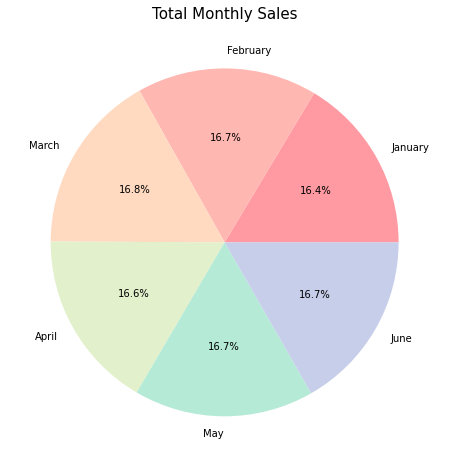

In [31]:
new_month = monthly_sales_df.transpose() 
plt.figure(figsize=(12,8))
plt.pie(new_month['Total Monthly Sales'], labels=new_month.index, autopct='%1.1f%%',labeldistance=1.1,
        colors = ['#FF9AA2', '#FFB7B2', '#FFDAC1','#E2F0CB', '#B5EAD7', '#C7CEEA', '#FFD1DC']);
plt.title('Total Monthly Sales',fontsize=15)
plt.show();


## DataFrame II: Total Sales per Item

In [32]:
item_sales_df = total_sales_df.iloc[0:7,1:8]
item_sales_df

Month,January,February,March,April,May,June,Total Sales per Item
Items,,,,,,,
Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698,77033298
Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000,89364000
Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100,8897850
Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096,47452610
Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330,116868720
Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094,11821794
Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000,29714500


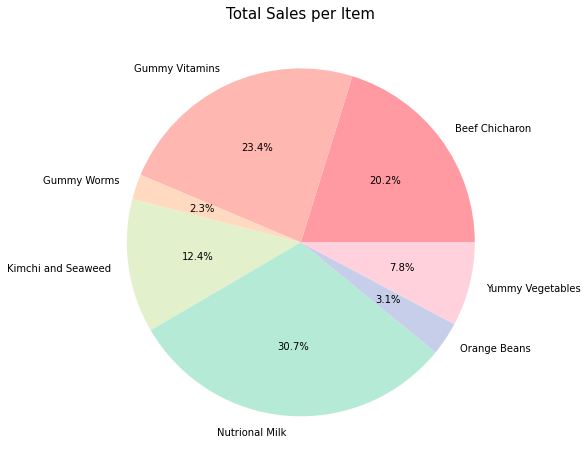

In [33]:
products = item_sales_df.index
values = item_sales_df['Total Sales per Item']

plt.figure(figsize=(12,8))
plt.pie(values, labels=products, autopct='%1.1f%%',labeldistance=1.1,
        colors = ['#FF9AA2', '#FFB7B2', '#FFDAC1','#E2F0CB', '#B5EAD7', '#C7CEEA', '#FFD1DC']);
plt.title('Total Sales per Item',fontsize=15)
plt.show();

# III. Customer Loyalty

### A. Repeater: Number of customers from the current month who also purchased in the previous month

In [34]:
months_list = ['January','February','March','April','May','June']

# Gets the index based on the months_list 
def repeater(month):
    month_index = months_list.index(month)

    # Refers to January
    if month_index == 0:
        past_month=None
    else:
        past_month = months_list[month_index-1:month_index][0]

    # DataFrame referring to customers who purchased during the current month
    current_df = df[df["month"]==month].drop_duplicates(subset=['name'])
    current_customers = set(current_df['name'])

    # DataFrame referring to customers who purchased during the past month
    past_df = df[df["month"]==past_month].drop_duplicates(subset=['name'])
    past_customers = set(past_df['name'])

    # Compares the set of customers who purchased during the current month and past month
    return len(current_customers & past_customers)


# Creates a dictionary for the customers who are repeaters per month
repeater_dict = {i:repeater(i) for i in months_list}
repeater_series = pd.Series(repeater_dict) 
repeater_series

January        0
February    5172
March       5216
April       5154
May         5110
June        5193
dtype: int64

### B. Inactive: Number of customers who have purchase history but do not have a purchase for the current month

In [35]:
months_list = ['January','February','March','April','May','June']

# Gets the index based on the months_list 
def inactive(month):
    month_index = months_list.index(month)
    past_months = months_list[:month_index]

    # DataFrame referring to customers who purchased during the current month
    current = df[df["month"]==month].drop_duplicates(subset=['name'])
    current_customers = list(current['name'])

    # DataFrame referring to customers who purchased during the past month
    past = df[df["month"].isin(past_months)].drop_duplicates(subset=['name'])
    past_customers = list(past['name'])

    for name in current_customers:
        if name in past_customers:
            past_customers.remove(name)
        else:
            continue

    return len(past_customers)

inactive_dict = {i:inactive(i) for i in months_list}
inactive_series = pd.Series(inactive_dict) 
inactive_series

January        0
February    1416
March       1747
April       1909
May         1917
June        1835
dtype: int64

### C. Engaged Customers: Customers who consistently purchased every single month  

In [36]:
months_list = ['January','February','March','April','May','June']

def engaged(month):
    
    # Creates a set pertaining to all customers who purchased per month
    def customers_per_month(month):
        engaged = sorted(set(df[df["month"]==month].drop_duplicates(subset=['name'])['name']))
        return engaged

      # Creates a set pertaining to all customers who purchased per month
    current_dict = {i:customers_per_month(i) for i in list(months.values())}

    i = 0
    mon1=months_list[0]
    engaged = set(current_dict[mon1])

    # Creates & gets the list of current customers
    while i <= months_list.index(month):
        current_month = months_list[i]
        current_list = set(current_dict[current_month])
        
        # Compares the set of engaged and current customers
        engaged = engaged & current_list
        i = i+1
        if i > months_list.index(month):
            
            # Shows the total at the end of a certain month 
            return len(engaged)

engaged_dict={i:engaged(i) for i in months_list}
engaged_series=pd.Series(engaged_dict)
engaged_series

January     6588
February    5172
March       4126
April       3289
May         2667
June        2190
dtype: int64

### DataFrame III: Repeater, Inactive, Engaged

In [37]:
rie_df = pd.DataFrame({'Repeaters':repeater_series,'Inactive':inactive_series,'Engaged':engaged_series}).transpose()
rie_df

,January,February,March,April,May,June
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835
Engaged,6588,5172,4126,3289,2667,2190


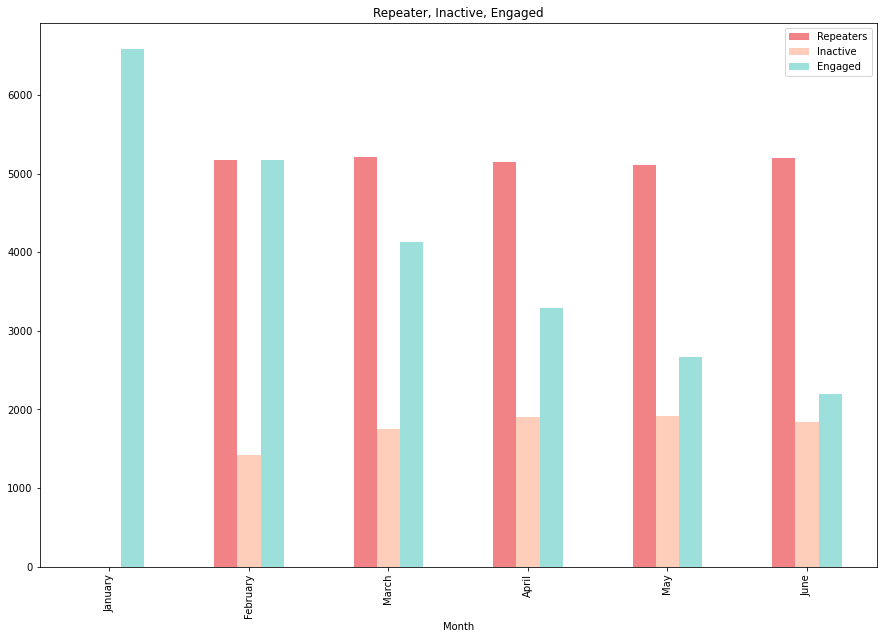

In [38]:
new_df = rie_df.transpose()
new_df.index.name = 'Month'
new_df.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

new_df=new_df[['Month','Repeaters','Inactive','Engaged']]

new_df.plot(x='Month',
        kind='bar',
        stacked=False,
        title='Repeater, Inactive, Engaged',
           figsize=(15,10),
           color = ['#F18387','#FFCEBB', '#9DDFDA']);